## lab 10
## data science

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations




In [7]:
nodes = ['A', 'B', 'C', 'D', 'E', 'F']
edges = [('A', 'B'), ('A', 'E'), ('B', 'D'), ('C', 'D'), ('D', 'E'), ('E', 'F')]


In [8]:
# Create the graph
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

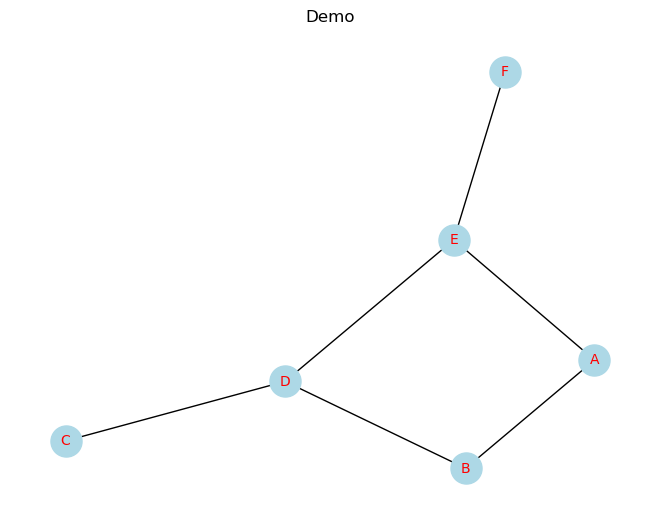

In [9]:
# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='Red')
plt.title("Demo")
plt.show()

In [10]:
# Calculate the probability
V = 7  # number of nodes
E = 9  # number of edges

# Total possible edges in a complete graph
total_possible_edges = len(list(combinations(nodes, 2)))

# Probability that an edge is present
prob_edge = E / total_possible_edges

# Probability that XZ is an edge given XY and YZ are edges
# Using the formula given in the slide:
# Probability = (|E| - 2) / (|V|C2 - 2)
prob_XZ_given_XY_YZ = (E - 2) / (total_possible_edges - 2)
#prob_XZ_given_XY_YZ= 1-prob_edge

print(f"Probability that an edge is present: {prob_edge:.2f}")
print(f"Probability that XZ is an edge given XY and YZ are edges: {prob_XZ_given_XY_YZ:.2f}")

Probability that an edge is present: 0.60
Probability that XZ is an edge given XY and YZ are edges: 0.54


In [11]:
GG = {
    'A': ['B', 'E'],
    'B': ['A', 'D'],
    'C': ['D'],
    'D': ['B', 'C', 'E'],
    'E': ['A', 'D', 'F'],
    'F': ['E']
}


In [12]:
# Create the graph
G = nx.Graph(GG)
G.add_nodes_from(nodes)
G.add_edges_from(edges)

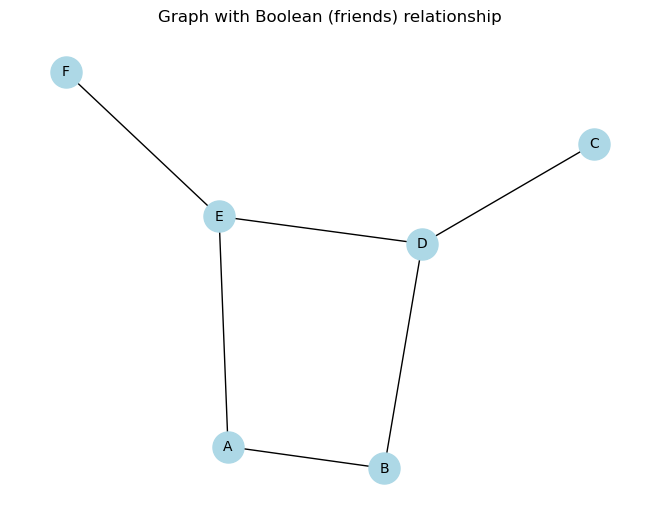

In [13]:
# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black')
plt.title("Graph with Boolean (friends) relationship")
plt.show()

In [26]:
# ✅ Step 1: Define your graph (adjacency list)
graph = {
    'A': ['B', 'E'],
    'B': ['A', 'D'],
    'C': ['D'],
    'D': ['B', 'C', 'E'],
    'E': ['A', 'D', 'F'],
    'F': ['E']
}

# ✅ Step 2: Define the helper function
def count_yes_total(graph, node):
    neighbors = graph[node]
    yes_count = 0
    total_pairs = 0
    
    # Check all unique pairs of neighbors
    for i in range(len(neighbors)):
        for j in range(i + 1, len(neighbors)):
            total_pairs += 1
            n1, n2 = neighbors[i], neighbors[j]
            # Check if neighbors are connected
            if n2 in graph[n1]:
                yes_count += 1
    return yes_count, total_pairs


# ✅ Step 3: Compute totals
total_yes = 0
total_pairs = 0

for node in graph:
    yes_count, pairs = count_yes_total(graph, node)
    total_yes += yes_count
    total_pairs += pairs

# ✅ Step 4: Compute probability
probability = total_yes / total_pairs if total_pairs > 0 else 0
print(f"Probability that YZ is an edge given XY and XZ are edges: {probability:.2f}")

# ✅ Step 5: Show detailed output for each node
for node in graph:
    yes_count, pairs = count_yes_total(graph, node)
    if pairs > 0:
        print(f"Node {node}: Yes/Total = {yes_count}/{pairs} = {yes_count/pairs:.2f}")
    else:
        print(f"Node {node}: No pairs to check.")


Probability that YZ is an edge given XY and XZ are edges: 0.00
Node A: Yes/Total = 0/1 = 0.00
Node B: Yes/Total = 0/1 = 0.00
Node C: No pairs to check.
Node D: Yes/Total = 0/3 = 0.00
Node E: Yes/Total = 0/3 = 0.00
Node F: No pairs to check.
